# Домашнее задание №6

Задание выполнил(а): `(FIO)`

### Общая информация

__Дедлайн:__ 17.03.2022 23:30


### О задании

Часть 1 содержит практическое задание на применение методов KMeans и DBSCAN.

Часть 2 содержит практическое задание на реализацию метода KMeans.

Часть 3 содержит практическое задание на снижение размерности с помощью PCA и кластеризацию табличных данных.


### Оценивание и штрафы


#### 1. k-means and DBSCAN на картинках [4 балла]
* [Задание 1](#task1) [2 балла]
* [Задание 2](#task2) [1 балл]
* [Задание 3](#task3) [1 балл]

#### 2. k-means своими руками [4 балла]
* [Задание 1](#task2_1) [1 балл]
* [Задание 2](#task2_2) [3 балла]

#### 3. PCA + кластеризация [6 баллов]
* [Задание 1](#task3_1) [1 балл]
* [Задание 2](#task3_2) [1 балл]
* [Задание 3](#task3_3) [1 балл]
* [Задание 4](#task3_4) [1 балл]
* [Задание 5](#task3_5) [2 балла]

Итоговая оценка за домашнюю работу вычисляется по формуле: $$s \cdot \frac{10}{14},$$ где $s$ - сумма набранных балов. 

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 0.25 балла в день (от оценки в 10 бальной шкале), но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/course/890). 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams['figure.figsize'] = (8, 5)
%matplotlib inline

# Часть 1. Кластеризация цифр.

В этом задании вам нужно будет кластеризовать изображения цифр. В данном случае одна картинка - это один объект (признаков столько, сколько на картинке пикселей).

In [2]:
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()

In [4]:
digits = digits["data"]

Число объектов и признаков:

In [5]:
digits.shape

(1797, 64)

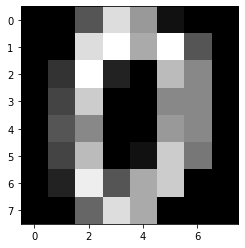

In [7]:
# Каждый объект - изображение цифры размеров 8 x 8
plt.imshow(digits[0].reshape(8, 8), cmap="gray")
plt.show()

In [8]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

### Задание 1 [2 балла] <a id="task1"></a>

Кластеризуйте цифры методами кластеризации k-means ([`sklearn.cluster.KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)) и DBSCAN ([`sklearn.cluster.DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)). Измерьте качество кластеризации с помощью метрики Silhouette Coefficient ([`sklearn.metrics.silhouette_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)).

In [9]:
k_means = KMeans(n_clusters = 10)
clusters = k_means.fit_predict(digits)
# type(clusters)
# clusters.shape
print(clusters)
# clusters

[3 2 2 ... 2 9 9]


In [10]:
silhouette_score(digits, labels=clusters)

0.182532498307321

In [11]:
dbscan = DBSCAN()
pca = PCA(2)
df = pca.fit_transform(digits)
clusters2 = dbscan.fit_predict(df)

# len(clasters2)
clusters2[:40]
# Не понятно, что за фигня получилась. Он все объекты помещает в одну категорию?

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1], dtype=int64)

In [13]:
# Ок, попробуем вдумчивее, последовательнее, и через масштабирование
pca = PCA(n_components=2)
pca = pca.fit(digits)
digit_pca = pca.transform(digits)


scaler = StandardScaler()
std_digits = scaler.fit_transform(digit_pca)
std_digits

array([[-0.09416135,  1.66318362],
       [ 0.59493381, -1.62361208],
       [ 0.52273625, -0.77831848],
       ...,
       [ 0.80753494, -0.54412409],
       [-0.36425218,  0.97125394],
       [-0.02574753,  0.49763263]])

In [14]:
db = DBSCAN(eps=0.122, min_samples=10).fit(std_digits)
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(f'number of clusters in pca-DBSCAN: , {n_clusters_}')
# Офигеть, 20 кластеров наделал! Точнее, 19, потому как лейбл -1 принадлежит к выбросам.

number of clusters in pca-DBSCAN: , 20


In [15]:
silhouette_score(digits, labels=labels)
# Хм. отрицательный?

-0.12021933022475499

In [16]:
labels[:20]

array([ 0, -1,  1, -1, -1,  2, 15,  1,  1, -1,  3,  1,  1, -1,  4,  1,  5,
        1,  1,  2], dtype=int64)

"Силуэт" показывает, насколько среднее расстояние до объектов своего кластера отличается от среднего расстояния до объектов других кластеров. Данная величина лежит в диапазоне от -1 до 1. Значения, близкие к -1, соответствуют плохим (разрозненным) кластеризациям, значения, близкие к нулю, говорят о том, что кластеры пересекаются и накладываются друг на друга, значения, близкие к 1, соответствуют "плотным" четко выделенным кластерам. Таким образом, чем больше силуэт, тем более четко выделены кластеры, и они представляют собой компактные, плотно сгруппированные облака точек.

В нашем случае, для метода KMeans получился результат положительный, хоть и не то, чтобы хороший.
А для DBSCAN получилось прямо плохо - очень много выбросов задектил, значит кластеризация прошла, видимо, ужасно.

### Задание 2 [1 балл] <a id="task2"></a>

Для кластеризации методом k-means визуализируйте картинки - центры кластеров (метод `.cluster_centers_` у KMeans).

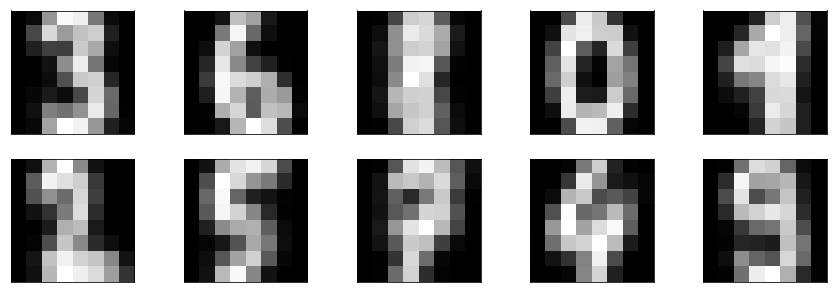

In [17]:
'''Построение центров кластеров, изученных с помощью k-средних:'''

_, axes = plt.subplots(2, 5, figsize=(15, 5))

for ax, center in zip(axes.ravel(), k_means.cluster_centers_):
#     ax.set_title(f'Cluster:')
    ax.matshow(center.reshape(8, 8), cmap=plt.cm.gray)
    ax.set_xticks(())
    ax.set_yticks(())

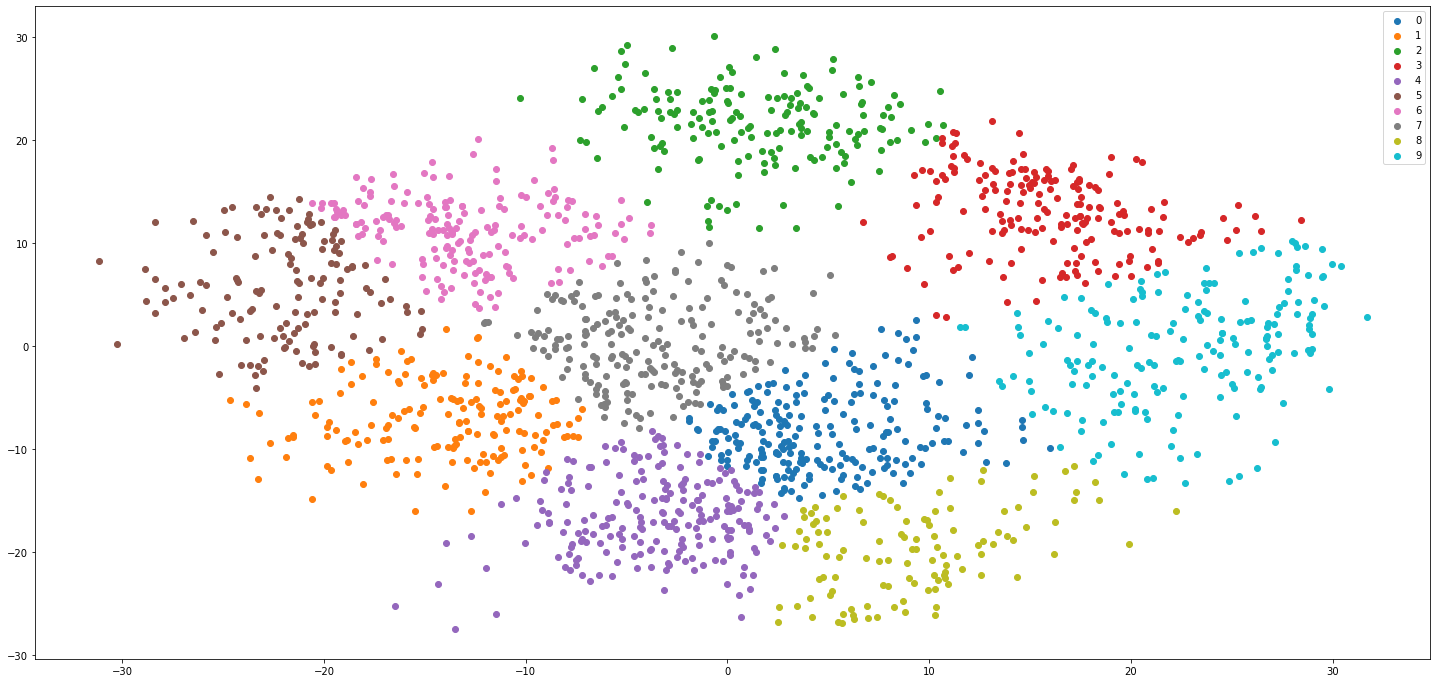

In [18]:
'''Визуализация c предварительным уменьшением размерности через PCA'''
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(digits)
 
 
#Initialize the class object
kmeans = KMeans(n_clusters= 10)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)  # передаём в kmeans уже объект меньшей размерности
 
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
plt.figure(figsize= (25,12))
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

### Задание 3 [1 балл] <a id="task3"></a>

Для кластеризации методом DBSCAN выведите три случайно выбранные картинки из каждого кластера.

In [19]:
labels = pd.DataFrame(db.labels_).rename(columns={0: 'label'})
digs = pd.DataFrame(digits)
the_matrix = pd.concat([labels, digs], axis=1)
the_matrix.rename_axis(columns=None, axis=0)

,label,0,1,2,3,4,5,6,7,8,...,54,55,56,57,58,59,60,61,62,63
0,0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,-1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,1,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,-1,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,-1,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,2,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,-1,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,-1,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [20]:
from random import shuffle

def get_3_label_sets(label):
    '''Созаёт список из трёх наборов, соответствующих метке, определенной DBSCAN'''
    random_digits_matrix = []
    label_matrix = the_matrix[the_matrix['label'] == label]
    random_digits_matrix = label_matrix.iloc[:3, 1:]
    return random_digits_matrix

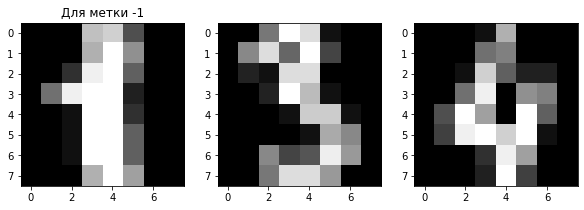

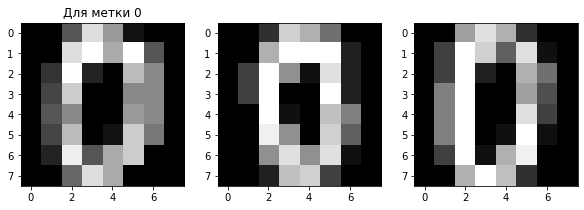

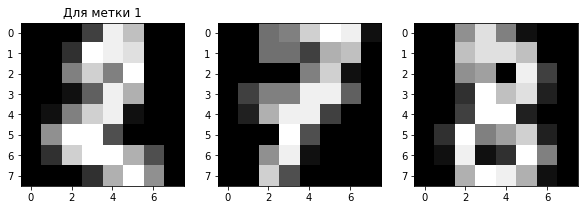

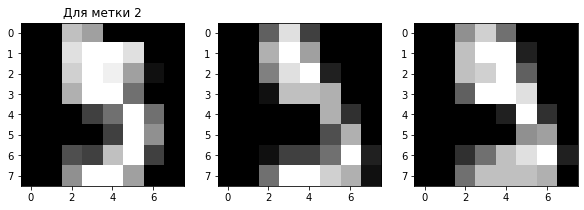

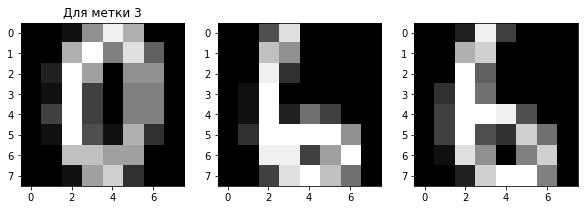

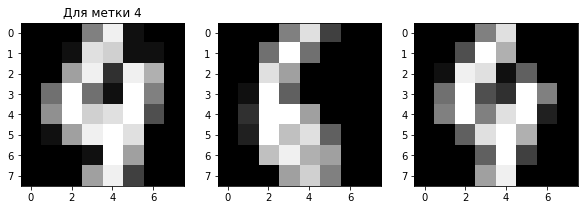

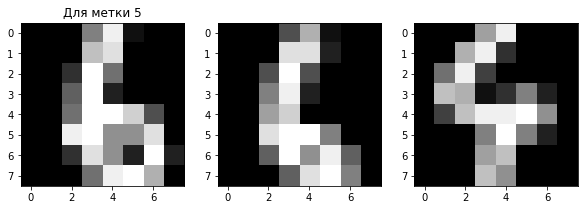

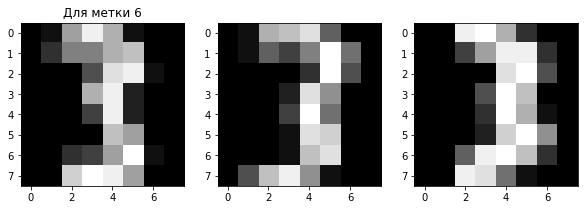

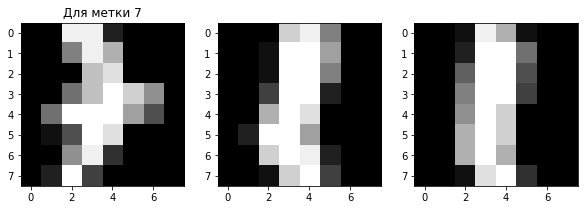

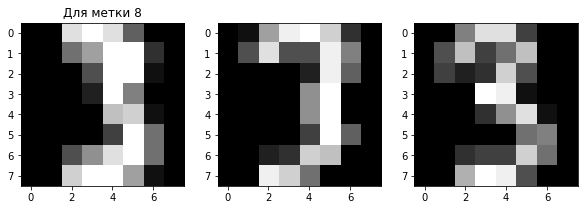

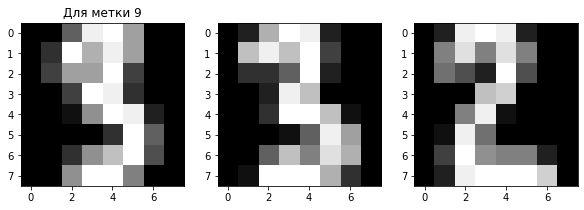

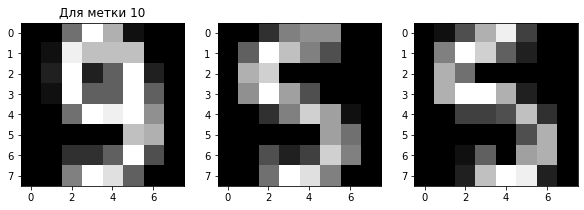

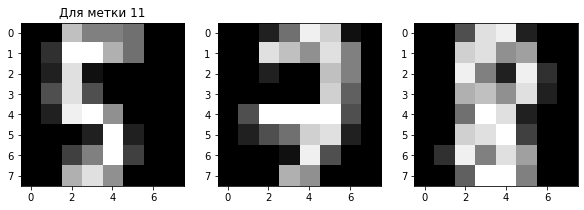

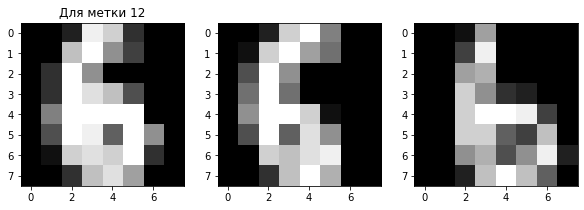

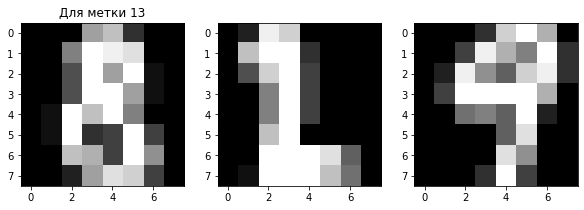

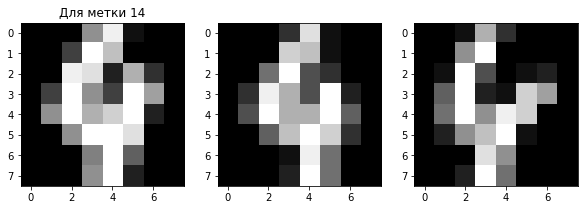

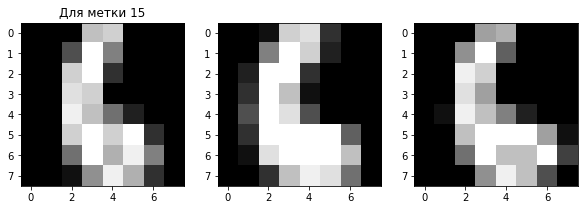

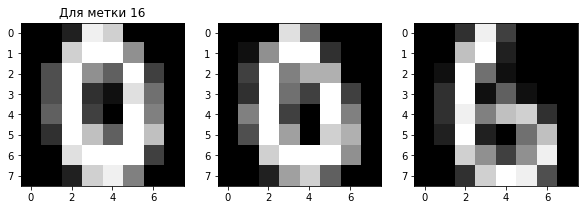

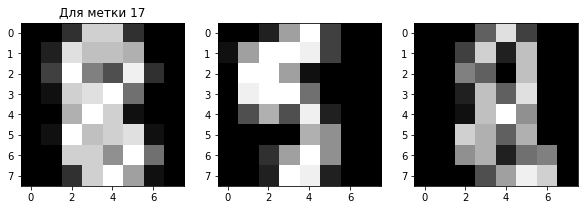

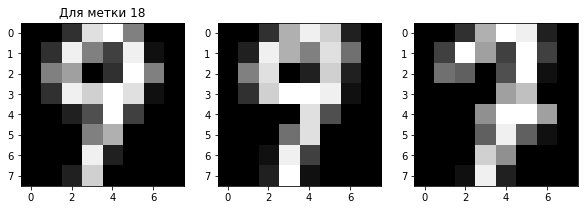

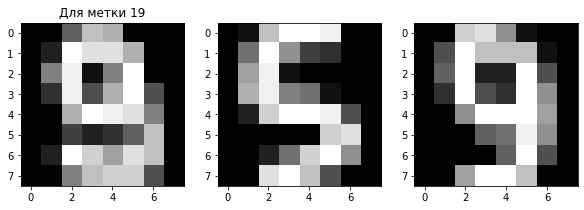

In [21]:
'''Для каждой уникальной метки вытаскиваем три набора, и рисум три цифры'''

u_labels = np.unique(labels)

for label in u_labels:
    digs_list = get_3_label_sets(label)
    fig, ax = plt.subplots(1,3, figsize=(10,3))
    ax[0].set_title(f'Для метки {label}')
    ax[0].imshow(np.array(digs_list.iloc[0]).reshape(8, 8), cmap="gray")
    ax[1].imshow(np.array(digs_list.iloc[1]).reshape(8, 8), cmap="gray")
    ax[2].imshow(np.array(digs_list.iloc[2]).reshape(8, 8), cmap="gray")
    plt.show()

Поскольку DBSCAN сам определяет количество кластеров (алгоритм рассматривает кластеры как области с высокой плотностью, разделенные областями с низкой плотностью), подсказок в виде количества кластеров, которое мы давали K-means мы не даём. Поэтому думаю и справился он с кластеризацией датасета так плохо. Понятно, что плохие результаты должны были получиться для "выбросов" (метка -1), но для остальных значений как-то совсем неважно.

# Часть 2. K-means своими руками

В этом задании вам нужно будет реализовать алгоритм K-Means. Для этого потребуется:

- следовать инструкциям
- воспользоваться базовыми техниками `numpy`
- понимание, что происходит в алгоритме K-Means

Сгенерируем случайную выборку. Матрица объекты-признаки находится в переменной $X$.

In [22]:
np.random.seed(13)
X1 = np.random.randn(100,2)
X2 = np.random.randn(100,2) - np.array([10,1])
X3 = np.random.randn(100,2) - np.array([1,10])
X = np.vstack((X1,X2,X3))

Визуализируем выборку:

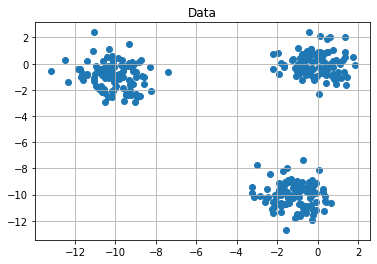

In [23]:
plt.scatter(X[:,0], X[:,1])
plt.title('Data')
plt.grid();

### Задание 1 [1 балл] <a id="task2_1"></a>

Чтобы реализовать алгоритм K-Means, нам понадобится вспомогательная функция. В процессе работы алгоритма мы все время обновляем значение целевой переменной для каждого объекта - то есть на каждом шаге вычисляем, к какому кластеру он относится. На каждом шаге нам известно, где находятся центры кластеров, так что задача - для каждого объекта посчитать расстояние до центров кластеров и выбрать ближайший из них в качестве ответа.

На практике это удобно сделать с помощью функции [`sklearn.metrics.pairwise_distances`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html). Она может принимать на вход два массива $X$ и $Y$, а на выходе предоставить матрицу расстояний, где в $i$-ой строке и $j$-ом столбце стоит расстояние между $i$-ым объектом в $X$ и $j$-ым объектом в $Y$.

Не воспрещается и реализовать это как-то по-другому.

Также в процессе вам возможно понадобится функция `np.argmin` (не забудьте про параметр `axis`!).

Алгоритм можно схематически представить в виде следующих шагов:

1. Инициализируем центры кластеров случайно (должно быть задано количество кластеров).
2. Относим точки к соответствующим кластерам (с минимальным расстоянием до их центра).
3. Производится пересчет центров кластеров по формуле центра масс для всех точек, принадлежащих кластеру.
4. Пункты 2-3 повторяются до тех пор пока центры кластеров перестанут меняться (сильно).

In [24]:
from sklearn.metrics import pairwise_distances

In [25]:
def compute_clusters(X, centers):
    """
    INPUT:
    X - np.array, (n_objects x n_features) - матрица объекты-признаки
    centers - np.array, (n_clusters x n_features) - матрица, содержащая координаты центров кластеров
    
    OUTPUT:
    y - np.array, (n_objects,) - вектор, состоящий из меток кластеров (0, 1, ..., n_clusters-1), где
    на i-ом месте стоит метка кластера для i-ого объекта выборки X
    """
    dist_matrix = pairwise_distances(X, centers, metric='euclidean', n_jobs=-1)
    y = np.argmin(dist_matrix, axis=1)
    return y

In [26]:
# check yourself
centers = (np.arange(6)*0.05).reshape(3, 2)
assert np.allclose(
    compute_clusters(X, centers), 
    np.array([0, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0,
       2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
)

### Задание 2 [3 балла] <a id="task2_2"></a>

Реализуйте класс KMeans, обладающий методами `fit` (находит оптимальные центры кластеров) и `transform` (вычисляет, к какому кластеру относятся каждый объект выборки).

Метод `fit`:

1. Посчитайте, сколько объектов и признаков есть в выборке. **(0.33 балла)**
2. Инициализируйте $y$ - вектор длины `n_objects` (число объектов в выборке $X$), хранящий изначальные метки кластеров для объектов (можно воспользоваться функциями `np.empty`, `np.random.randint` или какими-то другими). **(0.33 балла)**
3. Создайте матрицу для хранения центров кластеров (размера `n_clusters x n_features`) - можно заполнить ее нулями. **(0.33 балла)**
4. На каждой итерации обновите центры кластеров. То есть для каждого кластера посчитайте центр тяжести по формуле ниже и переместите центр кластера туда:
$$
c_j = \frac{\sum\limits_{x \in C^j}x}{|C^j| + \varepsilon},
$$
где $c_j$ - центр тяжести, $C^j$ - кластер, $x$ - объект из кластера $C^j$ (вектор - в сумме мы просто складываем их координаты), $|C^j|$ - число объектов в кластере $C^j$, $\varepsilon$ - какое-то очень маленькое число (например, $10^{-6}$) для стабильности - чтобы мы не поделили на $0$, если в кластере $C^j$ нет объектов. Возможно, в этом задании вам понадобятся функции `sum`, `mean` - не забывайте про параметр `axis`! **(1 балл)**
5. После перемещения центров кластеров в центры тяжести обновите $y$ - чтобы отнести объекты к кластерам с пересчитанными центрами. Каждый объект будет относиться к тому кластеру, расстояние от центра которого до объекта наименьшее. (Вот тут вам понадобится функция `compute_clusters`). **(0.5 балл)**

Метод `transform`:

1. Для выборки $X$ посчитайте, к какому из найденных кластеров (с центрами в `self.centers`) относится каждый объект. Здесь вам тоже понадобится функция `compute_clusters`). **(0.5 балла)**.

In [27]:
class KMeans:
    def __init__(self, n_clusters):
        # гиперпараметр - количество кластеров
        self.n_clusters = n_clusters
        
    def fit(self, X, max_iter=10, visualize=False):
        """
        INPUT:
        X - np.array, (n_objects x n_features) - матрица объекты-признаки
        max_iter - int - максимальное число итераций
        visualize - bool - визуализировать ли объекты и центры кластеров на каждой итерации 
        """
        # Цель: обучить центры кластеров self.centers, форма: число кластеров x число признаков
        
        # Шаг 1: сколько объектов и признаков? - 300 объектов с 2 признаками
        num_obj = X.shape[0]
        num_feat = X.shape[1]
        
        # Шаг 2: инициализируйте y - вектор длины n_objects, 
        # хранящий, к какому кластеру относится каждый объект
        # каждый элемент - случайно выбранный номер кластера - 300 нулевых объектов
        y = np.random.randint(self.n_clusters, size = num_obj)
        
        # Шаг 3: создайте матрицу для хранения центров кластеров
        self.centers = np.zeros((self.n_clusters, num_feat)) # по сути - по каждой строке - координата кластера
        
        for n_iter in range(max_iter):
            # Шаг 4: обновите центры кластеров
            for cl in range(self.n_clusters):
#                 self.centers[cl] = np.array([X[y==cl][:, 0].sum(), X[y==cl][:, 1].sum()]) / (X[y==cl].shape[0] + 1e-6)
                self.centers[cl] = np.sum(X[y==cl].T, axis=1)/(X[y==cl].shape[0]+ 1e-6)
            
            # Шаг 5: обновите y. Для этого вычислите расстояния между всеми объектами 
            # и центрами кластеров (используйте pairwise_distances), 
            # затем найдите ближайший к каждому объекту кластер
            
            y = compute_clusters(X, self.centers)
            
            # Поддержка флага visualize
            if visualize:
                plt.figure(figsize=(5,5))
                plt.scatter(X[:, 0], X[:, 1], c=y)
                plt.scatter(self.centers[:, 0], self.centers[:, 1], c='red', marker='x')
                plt.title('Step {}'.format(n_iter + 1))
                plt.show()
    
    def transform(self, X):
        """
        INPUT:
        X - np.array, (n_objects x n_features) - матрица объекты-признаки
        
        OUTPUT:
        y_pred - np.array, (n_objects,) - вектор, состоящий из меток кластеров (0, 1, ..., self.n_clusters-1), где
    на i-ом месте стоит метка кластера для i-ого объекта выборки X
        """        
        y_pred = compute_clusters(X, self.centers)
        return y_pred

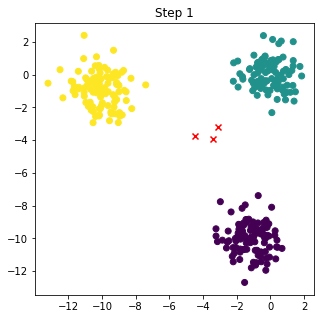

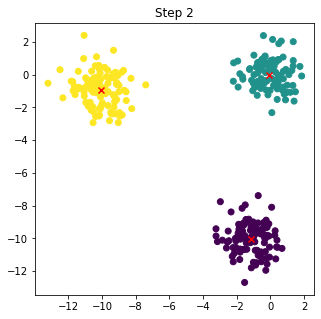

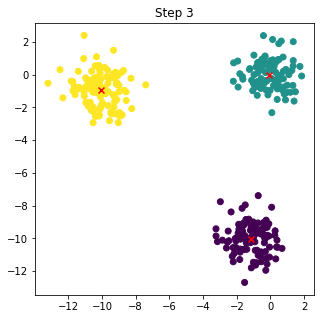

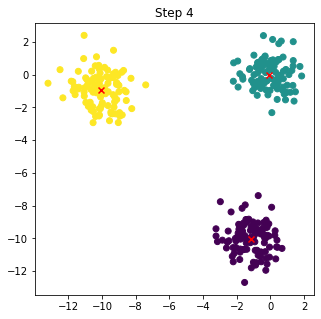

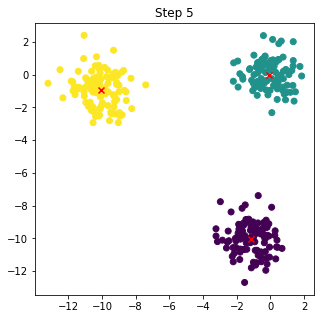

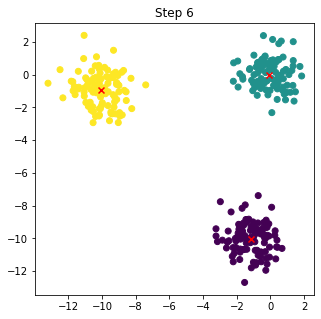

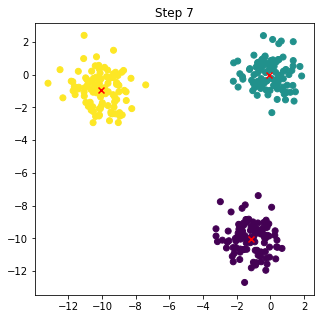

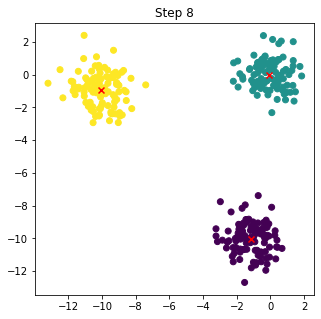

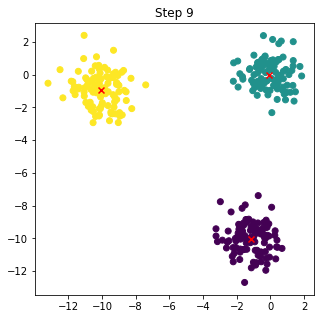

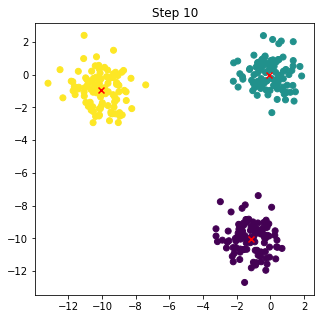

In [28]:
km = KMeans(3)
km.fit(X, visualize=True)
y = km.transform(X)

Итоговая кластеризация:

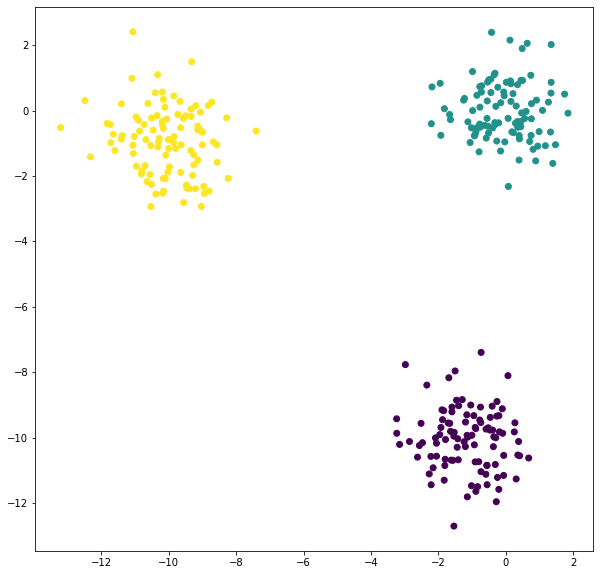

In [132]:
plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

# Часть 3. Снижение размерности и Кластеризация

Мы будем работать с набором данных [Samsung Human Activity Recognition](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones). Данные поступают с акселерометров и гироскопов мобильных телефонов Samsung Galaxy S3, также известен вид активности человека с телефоном в кармане – ходил ли он, стоял, лежал, сидел или шел вверх/вниз по лестнице.

Представим, что вид активности нам неизвестнен, и попробуем кластеризовать людей только на основе имеющихся данных акселератора.

In [29]:
X = pd.read_csv('samsung_data.csv')
y = pd.read_csv('samsung_labels.csv')

In [30]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [31]:
np.unique(y)

array([1, 2, 3, 4, 5, 6], dtype=int64)

Эти метки соответствуют:

1 - ходьбе,
2 - подъему вверх по лестнице,
3 - спуску по лестнице,
4 - сидению,
5 - стоянию,
6 - лежанию

### Задание 1 [1 балл] <a id="task3_1"></a>

Отмасштабируйте выборку с помощью StandardScaler. 

In [32]:
X.shape

(10299, 561)

In [33]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std.shape

(10299, 561)

### Задание 2 [1 балл] <a id="task3_2"></a>

Понижаем размерность с помощью PCA, оставляя столько компонент, сколько нужно для того, чтобы объяснить как минимум 90% дисперсии исходных (отмасштабированных) данных. Используйте отмасштабированную выборку и зафиксируйте random_state.

**Hint:** Напомним, что у PCA есть атрибут `explained_variance_ratio_`

In [34]:
X_pca = PCA(n_components=70, random_state=10)
X_pca.fit(X_std)

PCA(n_components=70, random_state=10)

In [35]:
X_pca.explained_variance_ratio_.sum()

0.9082470155082071

In [36]:
X_pca_transform = X_pca.transform(X_std)

In [37]:
y.value_counts()

0
6    1944
5    1906
4    1777
1    1722
2    1544
3    1406
dtype: int64

### Задание 3 [1 балл] <a id="task3_3"></a>


Визуализируйте данные (scatter plot) в проекции на первые две главные компоненты. Раскрасьте точки в соответствии с настоящими классами (`y`).

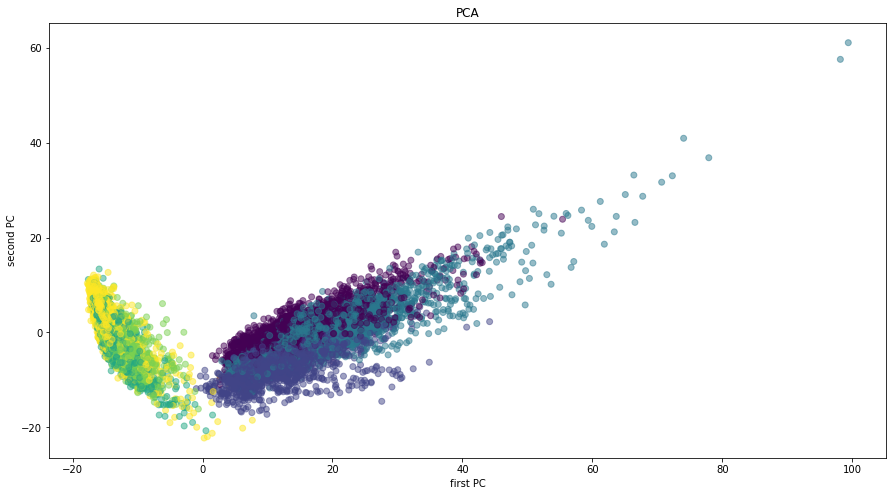

In [38]:
fig, ax = plt.subplots()
plt.scatter(X_pca_transform[:,0], X_pca_transform[:,1], c=np.array(y), alpha=0.5, cmap='viridis')
plt.title('PCA')
plt.xlabel("first PC")
plt.ylabel("second PC")


fig.set_figwidth(15)
fig.set_figheight(8)
plt.show()

### Задание 4 [1 балл] <a id="task3_4"></a>


Сделайте кластеризацию данных методом KMeans, обучив модель на данных со сниженной за счет PCA размерностью. В данном случае нужно искать 6 кластеров (так как у нас 6 классов). 

Визуализируйте данные в проекции на первые две главные компоненты. Раскрасьте точки в соответствии с полученными метками кластеров.

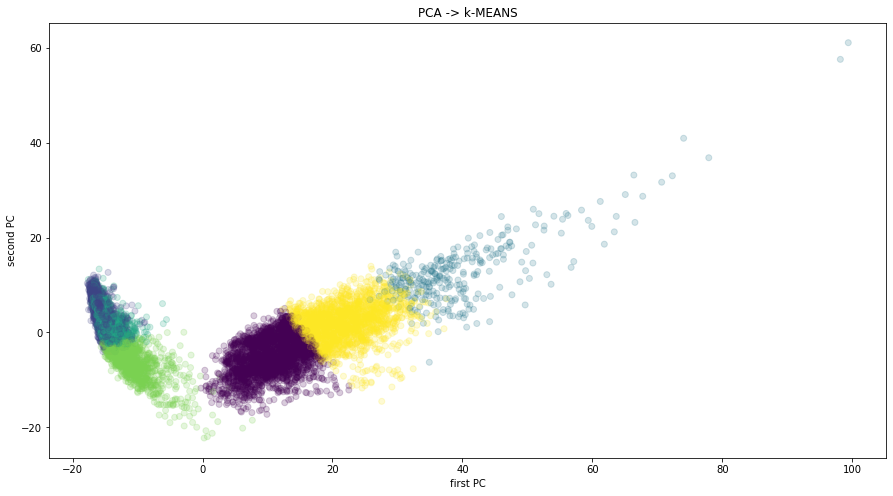

In [39]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=6, random_state=10)
labels_km = km.fit_predict(X_pca_transform)

fig, ax = plt.subplots()
plt.scatter(X_pca_transform[:,0], X_pca_transform[:,1], c=labels_km, alpha=0.2, cmap='viridis')
plt.title('PCA -> k-MEANS')
plt.xlabel("first PC")
plt.ylabel("second PC")

fig.set_figwidth(15)
fig.set_figheight(8)
plt.show()

In [40]:
silhouette_score(X, labels=labels_km)

0.1436922867397375

Модель разделила неплохо, а скор плохой. В конце дам комментарий со своими мыслями на этот счет.

### Задание 5 [2 балла] <a id="task3_5"></a>


Сделайте кластеризацию данных методом DBSCAN. Подберите гипераметры `eps` и `min_samples` максимизируя метрику `silhouette_score`. Обучайте модель на данных со сниженной за счет PCA размерностью. Ваша цель получить модель с `silhouette_score` 0.47 или больше.

Сравните лучшую модель c k-means в терминать `silhouette_score`.

Сначала посмотрим визуально зависимость успешности кластеризации от гиперпараметров.

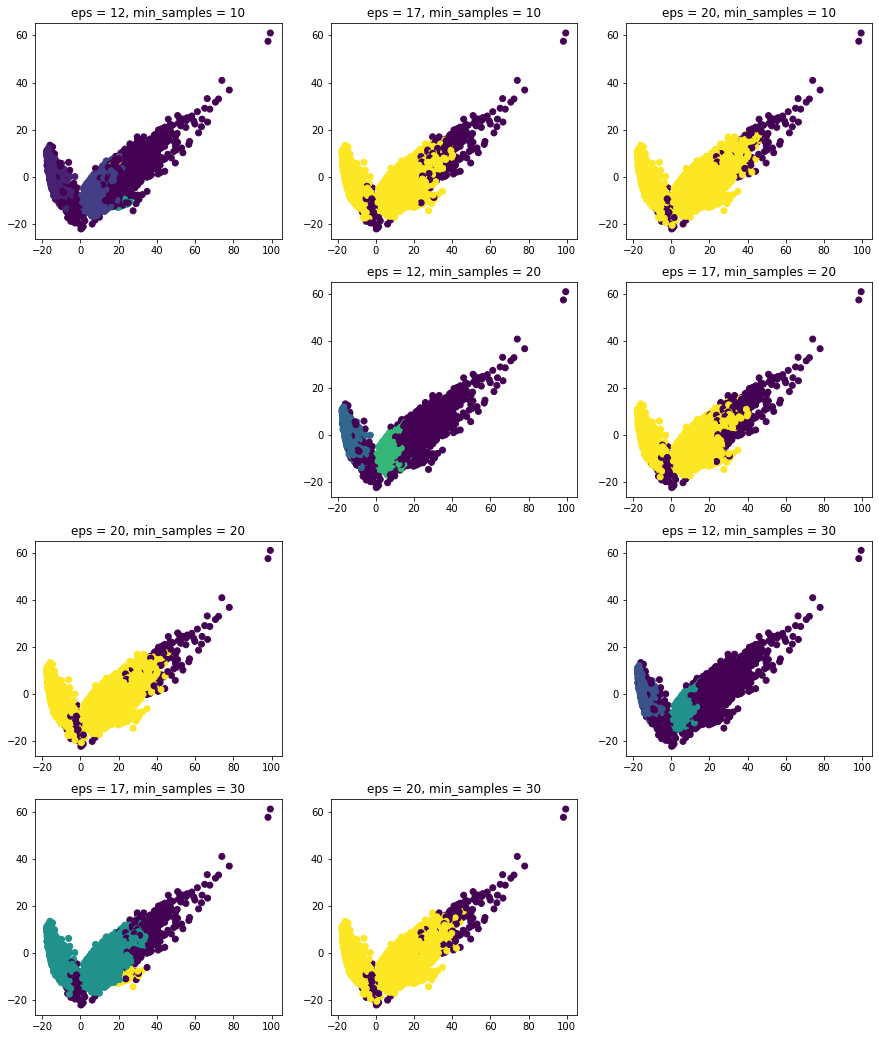

In [311]:
from sklearn.cluster import DBSCAN
plt.figure(figsize= (15,23))
i = 1
for samples in [10, 20, 30]:
    for e in [12, 17, 20]:
        dbscan = DBSCAN(eps=e, min_samples=samples)
        clusters = dbscan.fit_predict(X_pca_transform)
        plt.subplot(5, 3, i)
        plt.scatter(X_pca_transform[:,0], X_pca_transform[:,1], c = clusters)
        plt.title('eps = {}, min_samples = {}'.format(e, samples))
        i += 1
    i+=1

plt.show()

Параметры, при которых визуально кластеризация получается получше.

In [308]:
dbscan = DBSCAN(eps=17, min_samples=30)
clusters = dbscan.fit_predict(X_pca_transform)
silhouette_score(X, labels=clusters)

0.20317525311143533

При таких параметрах silhouette_score крайне небольшой!

Параметры, при которых выполняется условие silhouette_score > 0.47

In [314]:
dbscan = DBSCAN(eps=50, min_samples=17)
clusters = dbscan.fit_predict(X_pca_transform)
silhouette_score(X, labels=clusters)

0.6001832568914334

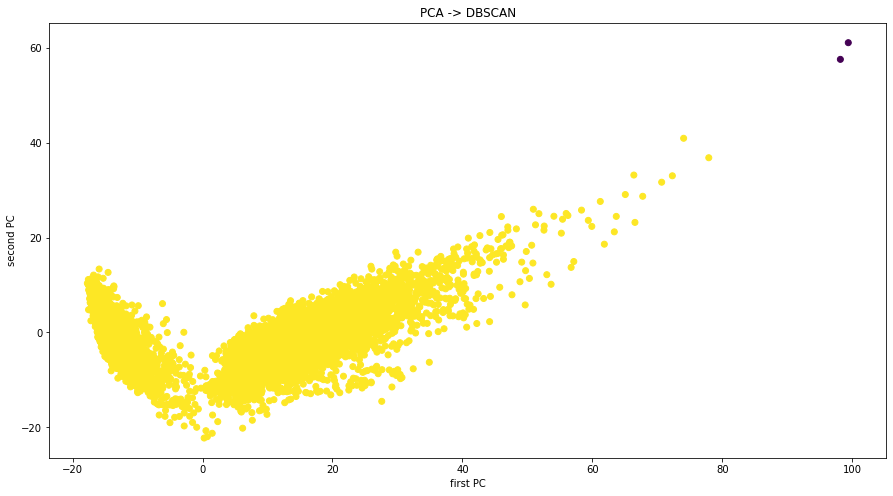

In [315]:
fig, ax = plt.subplots()
plt.scatter(X_pca_transform[:,0], X_pca_transform[:,1], c = clusters)
plt.title('PCA -> DBSCAN')
plt.xlabel("first PC")
plt.ylabel("second PC")

fig.set_figwidth(15)
fig.set_figheight(8)
plt.show()

Ужасно сработавшая модель имеет отличный score! Ниже объясню почему.

Я уже считал выше silhouette_score для k-means, дублирую снова.

In [312]:
silhouette_score(X, labels=labels_km)

0.1436922867397375

Мне кажется, я понимаю, в чем заключается парадокс: почему silhouette_score для неплохо сработавшей модели значительно хуже, чем для модели, которая нашла ещё один кластер из двух точек у черта на куличках.

Все дело в том, что и DBScan и silhouette_score плохо работают со сплошными, либо плохо пространственно-разграниченными объектами. Так как две крайние точки значительно удалены от остальной массы данных, silhouette_score остался доволен результатом )